In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('data.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
#creating a data structure with 60 timesteps and 1 output
x_train = []
y_train = []
for i in range(60, 499):
    x_train.append(training_set_scaled[i-1:i, 0])
    y_train.append(training_set_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

#reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [5]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [6]:
#initilising the RNN
regressor = Sequential()

In [7]:
#adding the first LSTM Layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape= (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [8]:
#adding a second LSTM layer and some dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [9]:
#adding a third LSTM layer and some dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [10]:
#adding a fourth LSTM layer and some dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [11]:
#adding the output layer
regressor.add(Dense(units=1))

In [12]:
#compiling the rnn
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
#Fitting the RNN to the training set
regressor.fit(x_train, y_train, epochs=100, batch_size=40)

Epoch 1/100
11/11 [==============================] - 0s 7ms/step - loss: 0.2505
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 0.2044
Epoch 3/100
11/11 [==============================] - 0s 8ms/step - loss: 0.1389
Epoch 4/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0580
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0380
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0306
Epoch 7/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0305
Epoch 8/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0239
Epoch 9/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0220
Epoch 10/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0171
Epoch 11/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0149
Epoch 12/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0102
Epoch 13/100
11/11 [=================

In [26]:
#Getting the real price
dataset_test = pd.read_csv('data.csv')
real_price = dataset_test.iloc[:, 1:2].values
df1 = pd.DataFrame(data=numpy_data1, columns=['Open (Real)'])
df1.to_csv('predicted_data.csv')

In [39]:
#Getting the predicted price

dataset_total=pd.concat((dataset_train['open'], dataset_test['open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_train) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
x_test =[]
for i in range(1,501):
    x_test.append(inputs[i-1:i,0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_price = regressor.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)


nd = np.array(predicted_price)
nd1 = np.array(real_price)
df = pd.DataFrame(data=[nd, nd1], columns=['Open (Predicted)', 'Open(Real)']).T
df.to_csv('predicted_data.csv')
print(df)

ValueError: Must pass 2-d input. shape=(2, 500, 1)

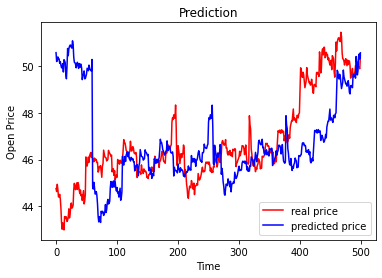

In [29]:
#visualising the results
plt.plot(real_price, color='red', label= 'real price')
plt.plot(predicted_price, color='blue', label= 'predicted price')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.legend()
plt.show()